# **Imbalanced Data Handling & Feature Selection**

- #### Objective : Identify the best Imbalanced data handling and Feature selection method. Perform multiple experiments with different methods and analyze the performance of the models.

In [2]:
#Installing pycaret
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 25.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 89.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 28.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━

In [3]:
#Importing everyting from classification module
from pycaret.classification import *

In [ ]:
# Importing necessary libraries
import pandas as pd

# Load the dataset
data = pd.read_csv('/content/train.csv')

# Display the first few rows
data.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [ ]:
# Check class distribution
data['TARGET'].value_counts()

,count
TARGET,
0,73012
1,3008


In [ ]:
data

In [ ]:
# Id is not required
data.drop('ID',axis=1,inplace=True)

In [ ]:
# Checking for null values
data.isnull().sum().sum()

In [ ]:
#Dropping any null values - there are no null values by the way
data.dropna(inplace=True)

In [ ]:
data.shape

In [ ]:
# Remove constant features (Features that are same for all rows)
constant_columns = [col for col in data.columns if data[col].nunique() == 1]
data.drop(constant_columns, axis=1, inplace=True)
data.shape

In [ ]:
# Remove quasi-constant features (threshold is 1%)(check if most frequent value appears 99% of times)
threshold = 0.01
quasi_constant_columns = [col for col in data.columns if data[col].value_counts(normalize=True, dropna=False).values[0] > 1 - threshold]
data.drop(quasi_constant_columns, axis=1, inplace=True)

In [ ]:
data.shape

In [ ]:
# Install required libraries if not already installed
!pip install imbalanced-learn pycaret

# Importing necessary libraries
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE, KMeansSMOTE

In [ ]:
X = data.drop('TARGET', axis=1)
y = data['TARGET']

In [ ]:
X.shape

In [ ]:
y.value_counts()

- Random undersampling

In [ ]:
# Random Undersampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X, y)

In [ ]:
X_rus.shape

(6016, 148)

In [ ]:
y_rus.value_counts()

,count
TARGET,
0,3008
1,3008


- SMOTE

In [ ]:
# SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

In [ ]:
X_smote.shape

(146024, 148)

In [ ]:
y_smote.value_counts()

,count
TARGET,
0,73012
1,73012


- Kmeans SMOTE

In [ ]:
kmeans_smote = KMeansSMOTE(random_state=42, cluster_balance_threshold=0.01)
X_kmeans_smote, y_kmeans_smote = kmeans_smote.fit_resample(X, y)

In [ ]:
X_kmeans_smote.shape

(146028, 148)

In [ ]:
y_kmeans_smote.value_counts()

,count
TARGET,
1,73016
0,73012


- Small imbalance is due to how Kmeans_smote works

In [ ]:
from pycaret.classification import *

- Pycaret on orginal dataset

In [ ]:
# Original dataset
exp_original = setup(data=data, target='TARGET', verbose=False,fold=5)
model_original = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ridge,Ridge Classifier,0.9604,0.7857,0.0005,0.1000,0.0009,0.0008,0.0061,0.6340
dummy,Dummy Classifier,0.9604,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.2700
lr,Logistic Regression,0.9603,0.6129,0.0000,0.0000,0.0000,-0.0002,-0.0016,11.4300
lightgbm,Light Gradient Boosting Machine,0.9602,0.8260,0.0052,0.3382,0.0103,0.0090,0.0371,5.1880
ada,Ada Boost Classifier,0.9600,0.8231,0.0052,0.2544,0.0102,0.0085,0.0305,4.8900
gbc,Gradient Boosting Classifier,0.9599,0.8306,0.0071,0.2874,0.0138,0.0117,0.0379,19.4800
xgboost,Extreme Gradient Boosting,0.9599,0.8149,0.0085,0.2841,0.0165,0.0143,0.0425,2.4720
knn,K Neighbors Classifier,0.9587,0.5894,0.0076,0.1460,0.0144,0.0101,0.0239,10.2260
svm,SVM - Linear Kernel,0.9563,0.6429,0.0162,0.0709,0.0231,0.0153,0.0181,1.1220
lda,Linear Discriminant Analysis,0.9559,0.7858,0.0370,0.2007,0.0623,0.0504,0.0705,1.4880


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- Pycaret on random undersampling

In [ ]:
# Random undersampling dataset
rus_data = pd.concat([X_rus, y_rus], axis=1)
exp_rus = setup(data=rus_data, target='TARGET', verbose=False,fold=5)
model_rus = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7621,0.8392,0.7678,0.7596,0.7635,0.5241,0.5244,1.8540
ada,Ada Boost Classifier,0.7566,0.8231,0.7602,0.7552,0.7575,0.5132,0.5134,0.4120
lightgbm,Light Gradient Boosting Machine,0.7526,0.8290,0.7512,0.7535,0.7522,0.5051,0.5053,1.4460
xgboost,Extreme Gradient Boosting,0.7402,0.8117,0.7483,0.7367,0.7424,0.4804,0.4806,0.4780
rf,Random Forest Classifier,0.7347,0.8067,0.7208,0.7425,0.7312,0.4695,0.4700,0.6440
et,Extra Trees Classifier,0.7110,0.7790,0.6880,0.7224,0.7043,0.4220,0.4230,0.6600
lda,Linear Discriminant Analysis,0.7103,0.7947,0.7464,0.6964,0.7204,0.4206,0.4219,0.1160
ridge,Ridge Classifier,0.7086,0.7950,0.7436,0.6953,0.7185,0.4172,0.4185,0.0920
dt,Decision Tree Classifier,0.6820,0.6877,0.6714,0.6863,0.6786,0.3641,0.3643,0.1180
knn,K Neighbors Classifier,0.6124,0.6434,0.6187,0.6114,0.6149,0.2249,0.2250,0.2480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- Pycaret on SMOTE dataset

In [ ]:
# SMOTE dataset
smote_data = pd.concat([X_smote, y_smote], axis=1)
exp_smote = setup(data=smote_data, target='TARGET', verbose=False,fold=5)
model_smote = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9431,0.9828,0.9473,0.9393,0.9433,0.8862,0.8862,16.3480
et,Extra Trees Classifier,0.9391,0.9788,0.9424,0.9363,0.9393,0.8782,0.8782,24.0200
xgboost,Extreme Gradient Boosting,0.9307,0.9819,0.9371,0.9253,0.9311,0.8614,0.8615,5.9820
dt,Decision Tree Classifier,0.9269,0.9352,0.9430,0.9136,0.9281,0.8538,0.8543,2.9500
lightgbm,Light Gradient Boosting Machine,0.9268,0.9797,0.9349,0.9199,0.9274,0.8535,0.8537,8.1740
gbc,Gradient Boosting Classifier,0.8998,0.9650,0.9039,0.8966,0.9002,0.7997,0.7997,44.3420
ada,Ada Boost Classifier,0.8786,0.9460,0.8860,0.8730,0.8795,0.7571,0.7572,10.6020
knn,K Neighbors Classifier,0.8361,0.9123,0.9127,0.7915,0.8478,0.6722,0.6803,34.9700
lda,Linear Discriminant Analysis,0.8251,0.9196,0.8895,0.7879,0.8357,0.6501,0.6556,3.1100
ridge,Ridge Classifier,0.8250,0.9196,0.8896,0.7878,0.8356,0.6500,0.6555,2.3200


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- Pycaret on Kmeans SMOTE dataset

In [ ]:
# k-Means SMOTE dataset
kmeans_smote_data = pd.concat([X_kmeans_smote, y_kmeans_smote], axis=1)
exp_kmeans_smote = setup(data=kmeans_smote_data, target='TARGET', verbose=False,fold=5)
model_kmeans_smote = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:41:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Gradient Boosting Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9589,0.9863,0.9654,0.9530,0.9592,0.9178,0.9179,16.8620
dt,Decision Tree Classifier,0.9438,0.9500,0.9655,0.9253,0.9450,0.8875,0.8884,2.8420
knn,K Neighbors Classifier,0.9169,0.9532,0.9561,0.8867,0.9201,0.8339,0.8364,35.2960
ada,Ada Boost Classifier,0.8917,0.9556,0.9031,0.8831,0.8929,0.7835,0.7837,10.3400
ridge,Ridge Classifier,0.8005,0.8969,0.8536,0.7717,0.8106,0.6010,0.6044,1.7880
qda,Quadratic Discriminant Analysis,0.5727,0.9206,0.9951,0.5394,0.6996,0.1454,0.2717,2.8340
lr,Logistic Regression,0.5697,0.7496,0.9707,0.5387,0.6928,0.1393,0.2332,23.3820
svm,SVM - Linear Kernel,0.5620,0.6598,0.6996,0.5812,0.5376,0.1241,0.1844,2.4280
nb,Naive Bayes,0.5394,0.7833,0.9951,0.5206,0.6836,0.0787,0.1914,0.7740


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9589,0.9863,0.9654,0.9530,0.9592,0.9178,0.9179,16.8620
et,Extra Trees Classifier,0.9567,0.9845,0.9658,0.9485,0.9571,0.9133,0.9135,22.1920
xgboost,Extreme Gradient Boosting,0.9478,0.9845,0.9581,0.9388,0.9483,0.8956,0.8958,5.4640
dt,Decision Tree Classifier,0.9438,0.9500,0.9655,0.9253,0.9450,0.8875,0.8884,2.8420
lightgbm,Light Gradient Boosting Machine,0.9431,0.9823,0.9551,0.9327,0.9437,0.8861,0.8864,7.0340
knn,K Neighbors Classifier,0.9169,0.9532,0.9561,0.8867,0.9201,0.8339,0.8364,35.2960
gbc,Gradient Boosting Classifier,0.9158,0.9672,0.9389,0.8975,0.9177,0.8317,0.8326,42.5520
ada,Ada Boost Classifier,0.8917,0.9556,0.9031,0.8831,0.8929,0.7835,0.7837,10.3400
ridge,Ridge Classifier,0.8005,0.8969,0.8536,0.7717,0.8106,0.6010,0.6044,1.7880
lda,Linear Discriminant Analysis,0.8003,0.8969,0.8531,0.7716,0.8103,0.6006,0.6040,3.0200


In [ ]:
evaluate_model(model_kmeans_smote)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

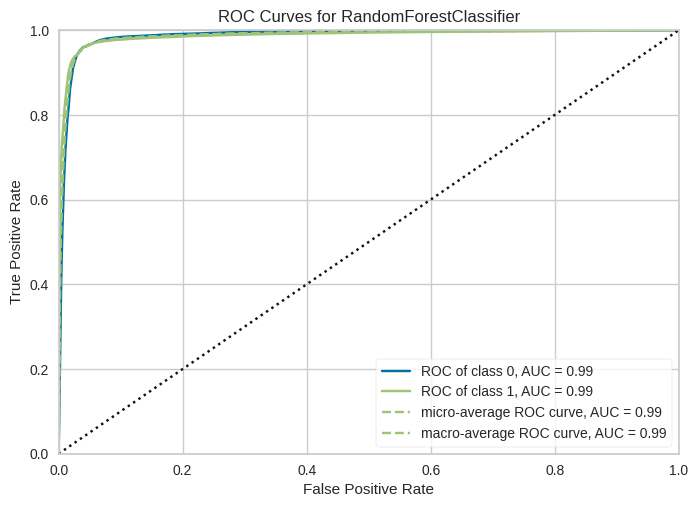

In [ ]:
plot_model(model_kmeans_smote)

In [ ]:
# Compare performance metrics
model_results = pull()
model_results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9589,0.9863,0.9654,0.9530,0.9592,0.9178,0.9179,16.862
et,Extra Trees Classifier,0.9567,0.9845,0.9658,0.9485,0.9571,0.9133,0.9135,22.192
xgboost,Extreme Gradient Boosting,0.9478,0.9845,0.9581,0.9388,0.9483,0.8956,0.8958,5.464
dt,Decision Tree Classifier,0.9438,0.9500,0.9655,0.9253,0.9450,0.8875,0.8884,2.842
lightgbm,Light Gradient Boosting Machine,0.9431,0.9823,0.9551,0.9327,0.9437,0.8861,0.8864,7.034
knn,K Neighbors Classifier,0.9169,0.9532,0.9561,0.8867,0.9201,0.8339,0.8364,35.296
gbc,Gradient Boosting Classifier,0.9158,0.9672,0.9389,0.8975,0.9177,0.8317,0.8326,42.552
ada,Ada Boost Classifier,0.8917,0.9556,0.9031,0.8831,0.8929,0.7835,0.7837,10.340
ridge,Ridge Classifier,0.8005,0.8969,0.8536,0.7717,0.8106,0.6010,0.6044,1.788
lda,Linear Discriminant Analysis,0.8003,0.8969,0.8531,0.7716,0.8103,0.6006,0.6040,3.020


- Kmeans SMOTE is the best sampled data, --reason mentioned in writeup conclusion

In [ ]:
kmeans_smote_data

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var41_comer_ult1,imp_op_var41_comer_ult3,imp_op_var41_efect_ult1,imp_op_var41_efect_ult3,imp_op_var41_ult1,...,saldo_medio_var12_hace2,saldo_medio_var12_hace3,saldo_medio_var12_ult1,saldo_medio_var12_ult3,saldo_medio_var13_corto_hace2,saldo_medio_var13_corto_hace3,saldo_medio_var13_corto_ult1,saldo_medio_var13_corto_ult3,var38,TARGET
0,2,23,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,39205.170000,0
1,2,34,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,300.0,122.22,300.0,240.75,49278.030000,0
2,2,23,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,67333.770000,0
3,2,37,0.000000,195.0,195.0,195.0,195.0,0.0,0.0,195.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,64007.970000,0
4,2,39,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,85501.89,85501.89,0.0,0.00,0.0,0.00,117310.979016,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,2,38,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,117310.979016,1
146024,2,47,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,117310.979016,1
146025,2,36,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,164999.160398,1
146026,2,33,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.00,36526.249023,1


# Feature selection tecnhiques

- Pycaret on orginal dataset

In [ ]:
# Feature Set 1: Train models using all features in the dataset
exp_all_features = setup(data=kmeans_smote_data, target='TARGET', verbose=False, fold=5)
model_all_features = compare_models()

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,18:08:11
Status,. . . . . . . . . . . . . . . . . .,Fitting 5 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Ada Boost Classifier


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9584,0.9866,0.9653,0.9522,0.9587,0.9168,0.9169,17.4880
dt,Decision Tree Classifier,0.9437,0.9499,0.9657,0.9251,0.9450,0.8875,0.8884,4.2400
knn,K Neighbors Classifier,0.9149,0.9551,0.9453,0.8911,0.9174,0.8297,0.8313,48.2800
ridge,Ridge Classifier,0.7988,0.8964,0.8522,0.7700,0.8090,0.5976,0.6011,1.5960
qda,Quadratic Discriminant Analysis,0.5728,0.9201,0.9950,0.5395,0.6996,0.1455,0.2718,2.5840
lr,Logistic Regression,0.5697,0.7474,0.9701,0.5387,0.6927,0.1394,0.2327,28.1460
svm,SVM - Linear Kernel,0.5542,0.7638,0.9842,0.5293,0.6883,0.1084,0.2136,2.5160
nb,Naive Bayes,0.5397,0.7825,0.9954,0.5208,0.6838,0.0794,0.1929,1.2220


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9584,0.9866,0.9653,0.9522,0.9587,0.9168,0.9169,17.4880
et,Extra Trees Classifier,0.9564,0.9847,0.9653,0.9484,0.9568,0.9128,0.9129,23.3660
xgboost,Extreme Gradient Boosting,0.9476,0.9849,0.9572,0.9391,0.9481,0.8951,0.8953,5.7060
dt,Decision Tree Classifier,0.9437,0.9499,0.9657,0.9251,0.9450,0.8875,0.8884,4.2400
lightgbm,Light Gradient Boosting Machine,0.9422,0.9825,0.9544,0.9318,0.9429,0.8845,0.8848,7.2700
gbc,Gradient Boosting Classifier,0.9162,0.9671,0.9406,0.8967,0.9182,0.8323,0.8333,43.3220
knn,K Neighbors Classifier,0.9149,0.9551,0.9453,0.8911,0.9174,0.8297,0.8313,48.2800
ada,Ada Boost Classifier,0.8909,0.9551,0.9006,0.8835,0.8920,0.7819,0.7820,11.3160
ridge,Ridge Classifier,0.7988,0.8964,0.8522,0.7700,0.8090,0.5976,0.6011,1.5960
lda,Linear Discriminant Analysis,0.7987,0.8964,0.8519,0.7699,0.8088,0.5973,0.6007,3.1900


-  pycaret with top 20 features using Filter(Chi-square(for categorical) & ANOVA(for continous)) method.

In [20]:
# Step 1: Identify Categorical and Continuous Features based on nunique
categorical_features = X_kmeans_smote.columns[X_kmeans_smote.nunique() < 4]
continuous_features = X_kmeans_smote.columns[X_kmeans_smote.nunique() >= 4]

In [25]:
len(categorical_features)

34

In [26]:
len(continuous_features)

114

In [27]:
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import pandas as pd

# Initialize a DataFrame to store feature scores
feature_scores = pd.DataFrame(index=X_kmeans_smote.columns)

# Step 2: Apply Chi-square for Categorical Features
if not categorical_features.empty:
    # Convert categorical features to numeric (if necessary)
    X_categorical = X_kmeans_smote[categorical_features].apply(LabelEncoder().fit_transform)
    chi2_selector = SelectKBest(chi2, k='all')  # Compute Chi-square scores for all categorical features
    chi2_selector.fit(X_categorical, y_kmeans_smote)
    feature_scores.loc[categorical_features, 'Chi2 Score'] = chi2_selector.scores_

# Step 3: Apply ANOVA F-value for Continuous Features
if not continuous_features.empty:
    X_continuous = X_kmeans_smote[continuous_features]
    anova_selector = SelectKBest(f_classif, k='all')  # Compute ANOVA F-value scores for all continuous features
    anova_selector.fit(X_continuous, y_kmeans_smote)
    feature_scores.loc[continuous_features, 'ANOVA Score'] = anova_selector.scores_

# Step 4: Normalize Scores
scaler = MinMaxScaler()

# Replace NaN scores with 0 before scaling
feature_scores = feature_scores.fillna(0)
feature_scores[['Chi2 Score', 'ANOVA Score']] = scaler.fit_transform(feature_scores[['Chi2 Score', 'ANOVA Score']])

# Step 5: Combine Scores
# You can sum or average the normalized scores to create a unified score
feature_scores['Combined Score'] = feature_scores['Chi2 Score'] + feature_scores['ANOVA Score']

# Step 6: Select Top 20 Features
top_20_features = feature_scores.sort_values(by='Combined Score', ascending=False).head(20).index

# Display the top 20 features
print("Top 20 Features Selected:", top_20_features.tolist())

Top 20 Features Selected: ['num_meses_var5_ult3', 'ind_var5', 'ind_var30', 'num_var30', 'num_var42', 'num_var5', 'num_var4', 'var36', 'var15', 'ind_var12_0', 'ind_var13_0', 'ind_var13', 'num_var35', 'ind_var43_recib_ult1', 'ind_var13_corto_0', 'ind_var13_corto', 'ind_var12', 'ind_var24_0', 'ind_var24', 'num_var13_0']


In [28]:
top_20_features

Index(['num_meses_var5_ult3', 'ind_var5', 'ind_var30', 'num_var30',
       'num_var42', 'num_var5', 'num_var4', 'var36', 'var15', 'ind_var12_0',
       'ind_var13_0', 'ind_var13', 'num_var35', 'ind_var43_recib_ult1',
       'ind_var13_corto_0', 'ind_var13_corto', 'ind_var12', 'ind_var24_0',
       'ind_var24', 'num_var13_0'],
      dtype='object')

In [29]:
X_kmeans_smote[top_20_features.tolist()]

,num_meses_var5_ult3,ind_var5,ind_var30,num_var30,num_var42,num_var5,num_var4,var36,var15,ind_var12_0,ind_var13_0,ind_var13,num_var35,ind_var43_recib_ult1,ind_var13_corto_0,ind_var13_corto,ind_var12,ind_var24_0,ind_var24,num_var13_0
0,0,0,0,0,0,0,0,99,23,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,0,0,1,3,34,0,1,1,3,0,1,1,0,0,0,3
2,3,1,1,3,3,3,1,99,23,0,0,0,3,0,0,0,0,0,0,0
3,2,1,1,3,3,3,3,2,37,0,0,0,9,0,0,0,0,0,0,0
4,3,0,1,3,3,0,1,1,39,1,0,0,3,1,0,0,1,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,0,0,0,0,0,0,0,99,38,0,0,0,0,0,0,0,0,0,0,0
146024,0,0,0,0,0,0,0,99,47,0,0,0,0,0,0,0,0,0,0,0
146025,0,0,0,0,0,0,0,99,36,0,0,0,0,0,0,0,0,0,0,0
146026,0,0,0,0,0,0,0,99,33,0,0,0,0,0,0,0,0,0,0,0


In [31]:
filter_method_data=pd.concat([X_kmeans_smote[top_20_features.tolist()],y_kmeans_smote],axis=1)
filter_method_data

,num_meses_var5_ult3,ind_var5,ind_var30,num_var30,num_var42,num_var5,num_var4,var36,var15,ind_var12_0,ind_var13_0,ind_var13,num_var35,ind_var43_recib_ult1,ind_var13_corto_0,ind_var13_corto,ind_var12,ind_var24_0,ind_var24,num_var13_0,TARGET
0,0,0,0,0,0,0,0,99,23,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,3,0,0,1,3,34,0,1,1,3,0,1,1,0,0,0,3,0
2,3,1,1,3,3,3,1,99,23,0,0,0,3,0,0,0,0,0,0,0,0
3,2,1,1,3,3,3,3,2,37,0,0,0,9,0,0,0,0,0,0,0,0
4,3,0,1,3,3,0,1,1,39,1,0,0,3,1,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146023,0,0,0,0,0,0,0,99,38,0,0,0,0,0,0,0,0,0,0,0,1
146024,0,0,0,0,0,0,0,99,47,0,0,0,0,0,0,0,0,0,0,0,1
146025,0,0,0,0,0,0,0,99,36,0,0,0,0,0,0,0,0,0,0,0,1
146026,0,0,0,0,0,0,0,99,33,0,0,0,0,0,0,0,0,0,0,0,1


In [32]:
# Feature Set 2: Train models using filter method data
filter_method_setup = setup(data=filter_method_data, target='TARGET', verbose=False, fold=5)
filter_method_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
xgboost,Extreme Gradient Boosting,0.8339,0.9120,0.8240,0.8406,0.8322,0.6678,0.6679,0.9960
rf,Random Forest Classifier,0.8336,0.9108,0.8282,0.8373,0.8327,0.6672,0.6673,4.8400
et,Extra Trees Classifier,0.8329,0.9089,0.8261,0.8375,0.8317,0.6658,0.6658,4.7960
lightgbm,Light Gradient Boosting Machine,0.8325,0.9099,0.8239,0.8383,0.8310,0.6649,0.6650,2.4520
dt,Decision Tree Classifier,0.8316,0.9055,0.8253,0.8359,0.8306,0.6633,0.6633,0.3300
gbc,Gradient Boosting Classifier,0.8194,0.8954,0.8142,0.8227,0.8184,0.6387,0.6388,5.1640
knn,K Neighbors Classifier,0.8155,0.8746,0.8167,0.8150,0.8156,0.6309,0.6312,18.5720
ada,Ada Boost Classifier,0.7997,0.8739,0.7768,0.8143,0.7950,0.5995,0.6002,2.1660
lr,Logistic Regression,0.7500,0.8452,0.8083,0.7240,0.7638,0.5001,0.5035,6.2060
ridge,Ridge Classifier,0.7447,0.8384,0.7896,0.7245,0.7557,0.4894,0.4914,0.1760


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

-  pycaret with top 20 features using Wrapper(Step Forward Selection) method.

In [42]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
import pandas as pd

# Assuming you have X_kmeans_smote (features) and y_kmeans_smote (target)

# Step 1: Define the model
model = LogisticRegression(max_iter=100, random_state=42)  # Simpler and faster model

# Step 2: Apply Sequential Feature Selector with Step Forward Selection
sfs = SequentialFeatureSelector(
    model,
    n_features_to_select=20,        # Number of features to select
    direction='forward',            # Step Forward Selection
    scoring='accuracy',             # Metric to evaluate model performance
    cv=2,                           # Reduce the number of cross-validation folds
    n_jobs=-1                       # Use all available cores for parallel processing
)

# Step 3: Fit SFS to the data
sfs.fit(X_kmeans_smote, y_kmeans_smote)

# Step 4: Get the selected top 20 features
selected_features = X_kmeans_smote.columns[sfs.get_support()]

# Display the top 20 features
print("Top 20 Features Selected using Step Forward Selection:", selected_features.tolist())


KeyboardInterrupt: 

In [ ]:
wrapper_method_data=pd.concat([X_kmeans_smote[selected_features.tolist()],y_kmeans_smote],axis=1)

In [ ]:
# Feature Set 3: Train models using wrapper method method data
wrapper_method_setup = setup(data=wrapper_method_data, target='TARGET', verbose=False, fold=5)
wrapper_method_model = compare_models()

- pycaret with top 20 features using Embedded Method(Use Random Forest) method.

In [34]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import numpy as np

# Assuming you have X_kmeans_smote (features) and y_kmeans_smote (target)

# Step 1: Train a Random Forest Model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can adjust parameters as needed
model.fit(X_kmeans_smote, y_kmeans_smote)

# Step 2: Extract Feature Importances
feature_importances = model.feature_importances_

# Create a DataFrame to hold feature names and their importances
importance_df = pd.DataFrame({
    'Feature': X_kmeans_smote.columns,
    'Importance': feature_importances
})

# Step 3: Select the Top 20 Features
top_20_features = importance_df.sort_values(by='Importance', ascending=False).head(20)

# Display the top 20 features
print("Top 20 Features Selected using Random Forest:")
print(top_20_features)

# Optionally, you can get the list of top 20 feature names
top_20_feature_names = top_20_features['Feature'].tolist()
print("Top 20 Feature Names:", top_20_feature_names)

Top 20 Features Selected using Random Forest:
                    Feature  Importance
147                   var38    0.290516
1                     var15    0.131059
135   saldo_medio_var5_ult3    0.030049
133  saldo_medio_var5_hace3    0.029360
112     num_meses_var5_ult3    0.027201
88              saldo_var30    0.024047
79                num_var42    0.021614
109          num_var22_ult3    0.019276
42                 num_var4    0.018418
70                num_var30    0.017669
15                 ind_var5    0.017350
80               saldo_var5    0.016735
90              saldo_var42    0.016180
34                ind_var30    0.015931
71                num_var35    0.015192
132  saldo_medio_var5_hace2    0.014305
91                    var36    0.013606
131          num_var45_ult3    0.013441
44                 num_var5    0.012473
129         num_var45_hace3    0.011499
Top 20 Feature Names: ['var38', 'var15', 'saldo_medio_var5_ult3', 'saldo_medio_var5_hace3', 'num_meses_var5_ult3',

In [35]:
embedded_method_data=pd.concat([X_kmeans_smote[top_20_feature_names],y_kmeans_smote],axis=1)

In [36]:
# Feature Set 4: Train models using embedded method method data
embedded_method_setup = setup(data=embedded_method_data, target='TARGET', verbose=False, fold=5)
embedded_method_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9524,0.9833,0.9649,0.9414,0.9530,0.9049,0.9051,11.0300
et,Extra Trees Classifier,0.9502,0.9814,0.9640,0.9381,0.9508,0.9003,0.9007,8.6040
xgboost,Extreme Gradient Boosting,0.9421,0.9814,0.9556,0.9304,0.9428,0.8841,0.8845,1.2180
dt,Decision Tree Classifier,0.9376,0.9450,0.9635,0.9161,0.9392,0.8752,0.8764,0.6680
lightgbm,Light Gradient Boosting Machine,0.9341,0.9776,0.9494,0.9213,0.9351,0.8683,0.8687,3.5360
knn,K Neighbors Classifier,0.9075,0.9493,0.9527,0.8737,0.9115,0.8150,0.8184,18.7660
gbc,Gradient Boosting Classifier,0.9033,0.9612,0.9304,0.8826,0.9059,0.8067,0.8079,17.4420
ada,Ada Boost Classifier,0.8759,0.9471,0.8935,0.8631,0.8781,0.7519,0.7523,4.5880
ridge,Ridge Classifier,0.7393,0.8332,0.7826,0.7202,0.7501,0.4786,0.4804,0.1420
lda,Linear Discriminant Analysis,0.7393,0.8332,0.7826,0.7202,0.7501,0.4786,0.4804,0.2280


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

- pycaret with top 20 features using Hybrid(Recursive Feature Elimination) method.

In [38]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
import pandas as pd

# Assuming you have X_kmeans_smote (features) and y_kmeans_smote (target)

# Step 1: Initialize the model
model = RandomForestClassifier(n_estimators=100, random_state=42)  # You can use other models too

# Step 2: Initialize RFE with the model
selector = RFE(estimator=model, n_features_to_select=20, step=10)  # n_features_to_select is set to 20

# Step 3: Fit RFE to the data
selector.fit(X_kmeans_smote, y_kmeans_smote)

# Step 4: Get the mask of selected features
mask = selector.support_

# Create a DataFrame to hold feature names and their RFE ranking
feature_ranking_df = pd.DataFrame({
    'Feature': X_kmeans_smote.columns,
    'Ranking': selector.ranking_
})

# Select the top 20 features
top_20_features = feature_ranking_df[mask].sort_values(by='Ranking').head(20)

# Display the top 20 features
print("Top 20 Features Selected using Recursive Feature Elimination (RFE):")
print(top_20_features)

# Optionally, get the list of top 20 feature names
top_20_feature_names_rfe = top_20_features['Feature'].tolist()
print("Top 20 Feature Names:", top_20_feature_names_rfe)

Top 20 Features Selected using Recursive Feature Elimination (RFE):
                     Feature  Ranking
1                      var15        1
134    saldo_medio_var5_ult1        1
133   saldo_medio_var5_hace3        1
131           num_var45_ult3        1
129          num_var45_hace3        1
112      num_meses_var5_ult3        1
109           num_var22_ult3        1
91                     var36        1
90               saldo_var42        1
88               saldo_var30        1
80                saldo_var5        1
79                 num_var42        1
71                 num_var35        1
70                 num_var30        1
69               num_var30_0        1
44                  num_var5        1
34                 ind_var30        1
8    imp_op_var41_efect_ult3        1
135    saldo_medio_var5_ult3        1
147                    var38        1
Top 20 Feature Names: ['var15', 'saldo_medio_var5_ult1', 'saldo_medio_var5_hace3', 'num_var45_ult3', 'num_var45_hace3', 'num_meses_var

In [39]:
rfe_method_data=pd.concat([X_kmeans_smote[top_20_feature_names_rfe],y_kmeans_smote],axis=1)

In [40]:
# Feature Set 5: Train models using rfe method method data
rfe_method_setup = setup(data=rfe_method_data, target='TARGET', verbose=False, fold=5)
rfe_method_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9524,0.9838,0.9644,0.9418,0.9530,0.9049,0.9051,11.2080
et,Extra Trees Classifier,0.9509,0.9821,0.9641,0.9393,0.9516,0.9019,0.9022,9.0540
xgboost,Extreme Gradient Boosting,0.9414,0.9818,0.9557,0.9292,0.9422,0.8828,0.8832,1.4720
dt,Decision Tree Classifier,0.9389,0.9463,0.9633,0.9185,0.9403,0.8778,0.8788,0.7840
lightgbm,Light Gradient Boosting Machine,0.9355,0.9784,0.9517,0.9219,0.9366,0.8711,0.8715,4.0360
knn,K Neighbors Classifier,0.9076,0.9509,0.9335,0.8875,0.9099,0.8151,0.8162,18.2940
gbc,Gradient Boosting Classifier,0.9059,0.9619,0.9315,0.8860,0.9082,0.8117,0.8128,17.6240
ada,Ada Boost Classifier,0.8807,0.9490,0.8967,0.8690,0.8826,0.7615,0.7619,3.8200
ridge,Ridge Classifier,0.7230,0.8139,0.7624,0.7067,0.7335,0.4460,0.4474,0.1980
lda,Linear Discriminant Analysis,0.7230,0.8139,0.7624,0.7067,0.7335,0.4460,0.4474,0.3480


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

# **WRITE UP**


# **1.Optimal Class Imbalance Handling Technique**


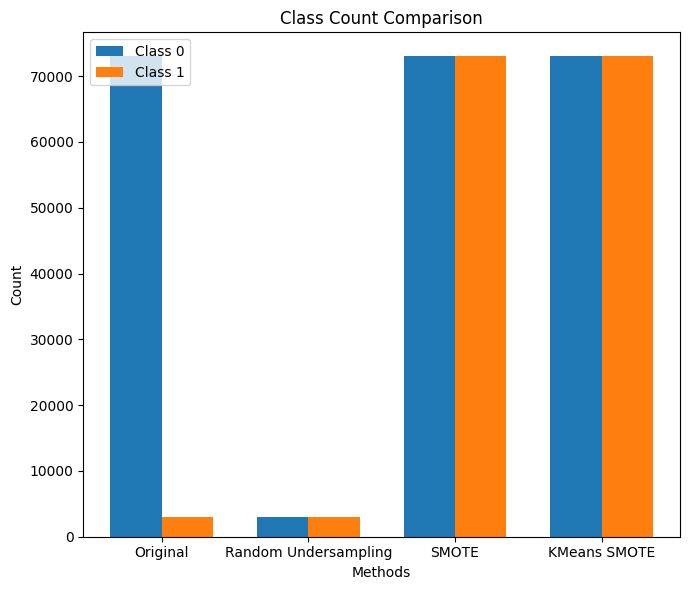

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the class count comparison
methods = ['Original', 'Random Undersampling', 'SMOTE', 'KMeans SMOTE']
class_0_counts = [73012, 3008, 73012, 73012]
class_1_counts = [3008, 3008, 73012, 73016]

# Plotting the class count comparison
plt.figure(figsize=(7, 6))

# Class count bar plot
x = np.arange(len(methods))
bar_width = 0.35
plt.bar(x - bar_width/2, class_0_counts, bar_width, label='Class 0')
plt.bar(x + bar_width/2, class_1_counts, bar_width, label='Class 1')

plt.xlabel('Methods')
plt.ylabel('Count')
plt.title('Class Count Comparison')
plt.xticks(x, methods)
plt.legend()

plt.tight_layout()
plt.show()


- We can see that the class distribution of various sampling techniques above

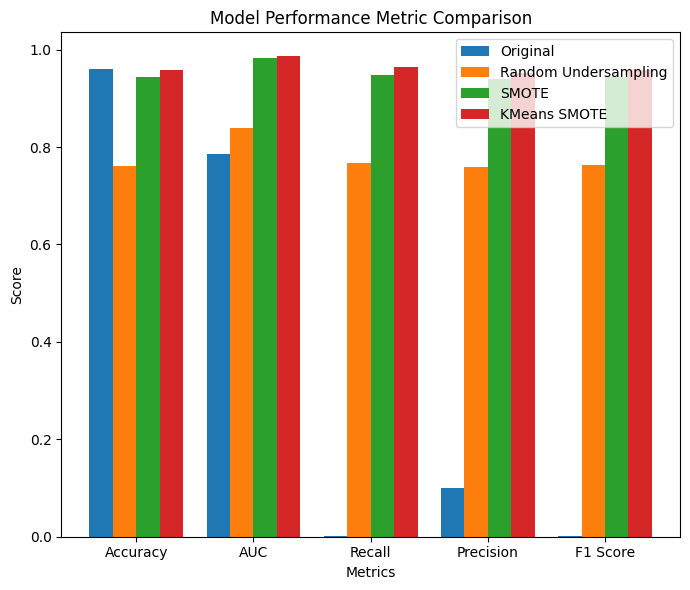

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the metric comparison
metrics = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
original_metrics = [0.9604, 0.7857, 0.0005, 0.1, 0.0009]
random_undersampling_metrics = [0.7621, 0.8392, 0.7678, 0.7596, 0.7635]
smote_metrics = [0.9431, 0.9828, 0.9473, 0.9393, 0.9433]
kmeans_smote_metrics = [0.9589, 0.9863, 0.9654, 0.9530, 0.9592]

# Plotting the metric comparison
plt.figure(figsize=(7, 6))

x = np.arange(len(metrics))
bar_width = 0.2

plt.bar(x - 1.5 * bar_width, original_metrics, bar_width, label='Original')
plt.bar(x - 0.5 * bar_width, random_undersampling_metrics, bar_width, label='Random Undersampling')
plt.bar(x + 0.5 * bar_width, smote_metrics, bar_width, label='SMOTE')
plt.bar(x + 1.5 * bar_width, kmeans_smote_metrics, bar_width, label='KMeans SMOTE')

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metric Comparison')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()


- We can see that SMOTE and Kmeans SMOTE consistently performs well for all the above metrics
- We are selecting Kmeans SMOTE as it has a slight edge over SMOTE as we can see in the graph above

# **2. Best Feature Selection Technique**

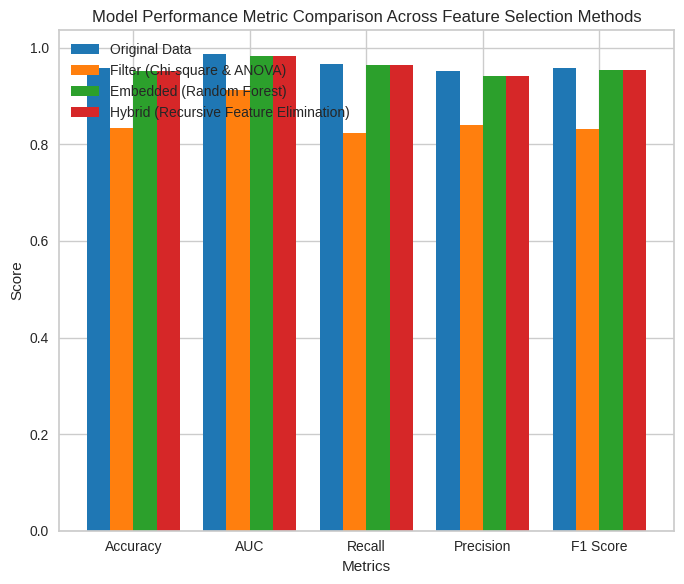

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the feature selection method comparison
metrics = ['Accuracy', 'AUC', 'Recall', 'Precision', 'F1 Score']
original_data = [0.9584, 0.9866, 0.9653, 0.9522, 0.9587]
filter_data = [0.8339, 0.9120, 0.8240, 0.8406, 0.8322]
embedded_data = [0.9524, 0.9833, 0.9649, 0.9414, 0.9530]
hybrid_data = [0.9524, 0.9838, 0.9644, 0.9418, 0.9530]

# Plotting the metric comparison
plt.figure(figsize=(7, 6))

x = np.arange(len(metrics))
bar_width = 0.2

plt.bar(x - 1.5 * bar_width, original_data, bar_width, label='Original Data', color='#1f77b4')  # Dark blue
plt.bar(x - 0.5 * bar_width, filter_data, bar_width, label='Filter (Chi-square & ANOVA)', color='#ff7f0e')  # Dark orange
plt.bar(x + 0.5 * bar_width, embedded_data, bar_width, label='Embedded (Random Forest)', color='#2ca02c')  # Dark green
plt.bar(x + 1.5 * bar_width, hybrid_data, bar_width, label='Hybrid (Recursive Feature Elimination)', color='#d62728')  # Dark red

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Performance Metric Comparison Across Feature Selection Methods')
plt.xticks(x, metrics)
plt.legend()

plt.tight_layout()
plt.show()


- If maintaining the highest performance is critical: Stick with the Original Data
- If you need to reduce dimensionality but want to maintain good performance, consider the Embedded or Hybrid methods.
- the Filter method might be worth exploring, but there is drop in performance.

# **3. Is 20 features enough for decent model performance as compared to all the features?**

Looking at the comparison graph above:
- Just as mentioned above if mainitaining best performance is a priority then Take the Orginal data(Kmeans smote data)
- If you want to reduce the number of features(dimentionality) and still want a good performance go with Embedded or Hybrid models

# **4. What are the top performing models? Have you observed one model consistently coming at the top?**

- From the pycaret comparison we can see that **Random Forest classifier** has been the top performing model, also it has come on top consistently number of times.